In [1]:
# Importing required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
#Loading Data
df = pd.read_csv('data.csv')

In [3]:
#Preprocessing Data
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(['loudness','duration_ms','tempo','song_title','artist'],axis=1,inplace=True)

In [5]:
# Dropping missing values rows
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   energy            2017 non-null   float64
 3   instrumentalness  2017 non-null   float64
 4   key               2017 non-null   int64  
 5   liveness          2017 non-null   float64
 6   mode              2017 non-null   int64  
 7   speechiness       2017 non-null   float64
 8   time_signature    2017 non-null   int64  
 9   valence           2017 non-null   float64
 10  target            2017 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 189.1 KB


In [7]:
df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,target
0,0.0102,0.833,0.434,0.021900,2,0.1650,1,0.4310,4,0.286,1
1,0.1990,0.743,0.359,0.006110,1,0.1370,1,0.0794,4,0.588,1
2,0.0344,0.838,0.412,0.000234,2,0.1590,1,0.2890,4,0.173,1
3,0.6040,0.494,0.338,0.510000,5,0.0922,1,0.0261,4,0.230,1
4,0.1800,0.678,0.561,0.512000,5,0.4390,0,0.0694,4,0.904,1


In [8]:
#Checking Factorability
#Barlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(2699.796275215078, 0.0)

In [9]:
#KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\Users\Ibrahim Shaikh\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.5359957839792154

In [10]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.21071137, 1.40419908, 1.23925754, 1.09300289, 1.04158137,
       0.9135114 , 0.81213928, 0.78956768, 0.64271256, 0.57736953,
       0.27594729])

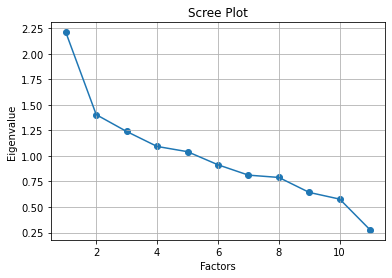

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df, 6)
fa.loadings_

array([[-0.62365684, -0.13781764,  0.02846661],
       [-0.29117928,  0.81343041,  0.13801523],
       [ 0.9827944 ,  0.03229081, -0.17983125],
       [-0.07657073, -0.29697219,  0.20388633],
       [ 0.09797464,  0.00842674,  0.02906476],
       [ 0.31481712, -0.19860481, -0.00729805],
       [-0.07228466, -0.02035445, -0.0732515 ],
       [ 0.06173205,  0.13882334,  0.10593512],
       [ 0.14788324,  0.17953545, -0.00874487],
       [-0.00365915,  0.59100907,  0.0059645 ],
       [-0.07635225, -0.07791107,  1.03292567]])

In [13]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.fit(df, 5)
fa.loadings_

array([[-0.62365684, -0.13781764,  0.02846661],
       [-0.29117928,  0.81343041,  0.13801523],
       [ 0.9827944 ,  0.03229081, -0.17983125],
       [-0.07657073, -0.29697219,  0.20388633],
       [ 0.09797464,  0.00842674,  0.02906476],
       [ 0.31481712, -0.19860481, -0.00729805],
       [-0.07228466, -0.02035445, -0.0732515 ],
       [ 0.06173205,  0.13882334,  0.10593512],
       [ 0.14788324,  0.17953545, -0.00874487],
       [-0.00365915,  0.59100907,  0.0059645 ],
       [-0.07635225, -0.07791107,  1.03292567]])

In [14]:
# Get variance of each factors
fa.get_factor_variance()

(array([1.59093841, 1.21669384, 1.178301  ]),
 array([0.14463076, 0.11060853, 0.10711827]),
 array([0.14463076, 0.2552393 , 0.36235757]))